data from https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

Propertycrime=α+Population+Population2+Murder+Robbery

The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
df = pd.DataFrame(pd.read_excel("ny_crime.xls", skiprows = 4))
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,nan,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,nan,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,nan,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,nan,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,nan
4,Albion Village,6388.0,23.0,0.0,nan,3.0,4.0,16.0,223.0,53.0,165.0,5.0,nan


In [71]:
df_clean = df.rename(columns={ df.columns[2]: "violent_crime",df.columns[3]: "murder",
                    df.columns[4]: "rape",df.columns[5]: "rape2",
                    df.columns[7]: "A_assault",df.columns[8]: "property_crime",
                    df.columns[10]: "larceny_theft",df.columns[11]: "motor_theft"})

columns_to_drop = {"City", "violent_crime", "rape", "rape2", "A_assault", "Arson3"}
df_use = df_clean.drop(columns_to_drop, axis =1).dropna()

df_use.head()

,Population,murder,Robbery,property_crime,Burglary,larceny_theft,motor_theft,Population_sqrd
0,1861.0,0.0,0.0,12.0,2.0,10.0,0.0,3463321.0
1,2577.0,0.0,0.0,24.0,3.0,20.0,1.0,6640929.0
2,2846.0,0.0,0.0,16.0,1.0,15.0,0.0,8099716.0
3,97956.0,8.0,227.0,4090.0,705.0,3243.0,142.0,9595377936.0
4,6388.0,0.0,4.0,223.0,53.0,165.0,5.0,40806544.0


In [72]:
df["Population_sqrd"] = df["Population"] **2

In [73]:
df_use["robbery_cat"] = np.where(df_use["Robbery"] != 0, 1, 0)
df_use["murder_cat"] = np.where(df_use["murder"] != 0, 1, 0)
df_use.head()

,Population,murder,Robbery,property_crime,Burglary,larceny_theft,motor_theft,Population_sqrd,robbery_cat,murder_cat
0,1861.0,0.0,0.0,12.0,2.0,10.0,0.0,3463321.0,0,0
1,2577.0,0.0,0.0,24.0,3.0,20.0,1.0,6640929.0,0,0
2,2846.0,0.0,0.0,16.0,1.0,15.0,0.0,8099716.0,0,0
3,97956.0,8.0,227.0,4090.0,705.0,3243.0,142.0,9595377936.0,1,1
4,6388.0,0.0,4.0,223.0,53.0,165.0,5.0,40806544.0,1,0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count               348.0
mean    792.6063218390805
std     7659.724745633149
min                   0.0
25%                  40.5
50%                 112.5
75%                 341.0
max              141971.0
Name: property_crime, dtype: float64

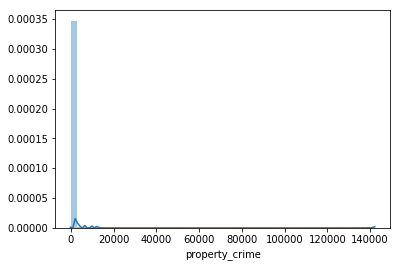

In [74]:
sns.distplot(df_use["property_crime"])
df_use["property_crime"].describe()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


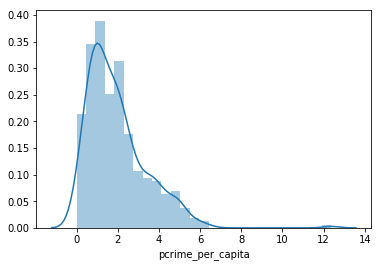

In [75]:
df_use["pcrime_per_capita"] = df_use["property_crime"] / df_use["Population"] * 100
sns.distplot(df_use["pcrime_per_capita"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


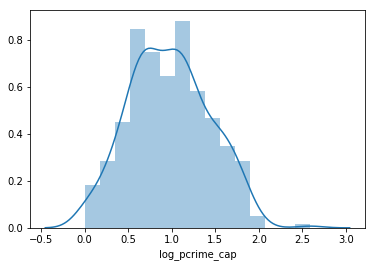

In [76]:
df_use["log_pcrime_cap"] = (df_use["pcrime_per_capita"]+1).apply(np.log)
sns.distplot(df_use["log_pcrime_cap"])

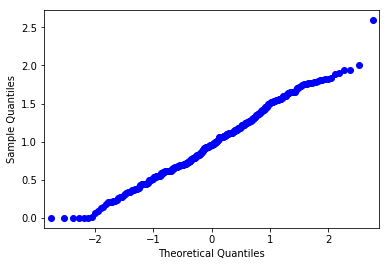

In [77]:
import statsmodels.api as sm

sm.qqplot(df_use["log_pcrime_cap"])
plt.show()

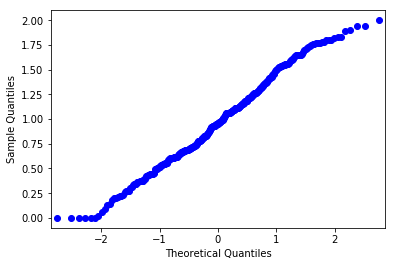

In [78]:
#remove the maximum values
sm.qqplot(df_use.drop(df_use['log_pcrime_cap'].idxmax())['log_pcrime_cap'])
plt.show()

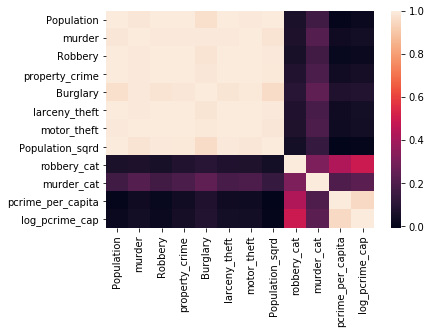

In [79]:
sns.heatmap(df_use.corr())

In [ ]:
# it seems that given the shared skewed-ness of the variables, 
#it would be sensible to perform log transformations to find better correlated relationships. 



In [111]:
df_use.head()

,Population,murder,Robbery,property_crime,Population_sqrd,robbery_cat,murder_cat,pcrime_per_capita,log_pcrime_cap
0,1861.0,0.0,0.0,12.0,3463321.0,0,0,0.6448146157979581,0.4976276823031618
1,2577.0,0.0,0.0,24.0,6640929.0,0,0,0.9313154831199069,0.6582013682061891
2,2846.0,0.0,0.0,16.0,8099716.0,0,0,0.5621925509486999,0.4460903158743443
3,97956.0,8.0,227.0,4090.0,9595377936.0,1,1,4.175344032014374,1.6439058165580651
4,6388.0,0.0,4.0,223.0,40806544.0,1,0,3.490920475892298,1.502057686510011


In [81]:
c_to_log = ("murder", "Robbery", "Burglary", "larceny_theft", "motor_theft")

for c in c_to_log:
    df_use["log_"+c+"_cap"] = ((df_use[c]/df_use["Population"])+1).apply(np.log)

df_use["log_Population"] = df_use["Population"].apply(np.log)
df_use.head()

#df_use.drop(["log_Population_cap"], axis = 1, inplace = True)

,Population,murder,Robbery,property_crime,Burglary,larceny_theft,motor_theft,Population_sqrd,robbery_cat,murder_cat,pcrime_per_capita,log_pcrime_cap,log_murder_cap,log_Robbery_cap,log_Burglary_cap,log_larceny_theft_cap,log_motor_theft_cap,log_Population
0,1861.0,0.0,0.0,12.0,2.0,10.0,0.0,3463321.0,0,0,0.6448146157979581,0.4976276823031618,0.0,0.0,0.0010741139593377236,0.00535906963183876,0.0,7.528869256642251
1,2577.0,0.0,0.0,24.0,3.0,20.0,1.0,6640929.0,0,0,0.9313154831199069,0.6582013682061891,0.0,0.0,0.0011634672632980494,0.007731001010383481,0.0003879728467675616,7.854381210652365
2,2846.0,0.0,0.0,16.0,1.0,15.0,0.0,8099716.0,0,0,0.5621925509486999,0.4460903158743443,0.0,0.0,0.00035130862823990107,0.005256714400312484,0.0,7.953669778649798
3,97956.0,8.0,227.0,4090.0,705.0,3243.0,142.0,9595377936.0,1,1,4.175344032014374,1.6439058165580651,8.166598616214908e-05,0.002314686027268163,0.00717133331699368,0.03257047712439944,0.0014485807464361064,11.492273677239357
4,6388.0,0.0,4.0,223.0,53.0,165.0,5.0,40806544.0,1,0,3.490920475892298,1.502057686510011,0.0,0.0006259781112076208,0.008262577211987704,0.025501729704593818,0.0007824114318237644,8.762176509334903


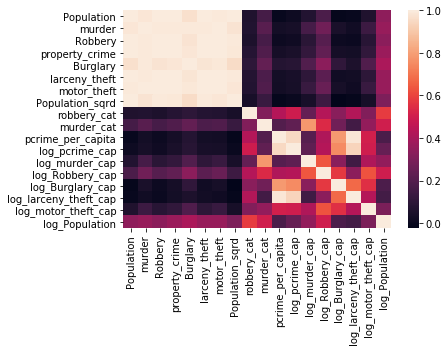

In [82]:
sns.heatmap(df_use.corr())

the log and categorical variables has much better fit with our target variable:(log(property crime / capita))

variables to use:
    log_population
    log_robbery_cap
    log_murder_cap
    
    and the constant term would actually signify the 

In [30]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_use['log_pcrime_cap']
X = df_use[['log_murder_cap','log_Population', 'log_Robbery_cap']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-1.07795884e+03  1.80573660e-02  2.93692421e+02]

Intercept: 
 0.7138366645760945

R-squared:
0.19019225658095884


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [83]:
c_to_log

('murder', 'Robbery', 'Burglary', 'larceny_theft', 'motor_theft')

In [95]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

linear_formula = 'log_pcrime_cap ~ robbery_cat+log_Population+log_Burglary_cap+log_larceny_theft_cap'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_use).fit()

In [96]:
#lm.params

In [97]:
lm.pvalues

Intercept                 0.0002186767117557429
robbery_cat               0.0003767814260162093
log_Population              0.01922219621234103
log_Burglary_cap           6.11911672375319e-20
log_larceny_theft_cap   1.6058770261120685e-113
dtype: float64

In [98]:
lm.rsquared

0.9186281416466355